In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os,json
from PIL import Image

#讀取檔案
wordcloud_path2=r"F:\資策會\專題\爬蟲\venv\word_cuttf_1230cleanstep.txt"
wordcloud_path=r"F:\資策會\專題\爬蟲\venv\w2v_cuttf_1230cleanstep.txt"
path=r"F:\資策會\專題\爬蟲\venv\collction_freefood_jay_clean"

In [3]:
data=pd.read_csv("F:\資策會\專題\R跟jupyternotebook_code\complete.csv")
#取出步驟放進df
with open(wordcloud_path,"r", encoding='utf-8') as f:
    ori_list=f.readlines()
    clean_list=[]
    for i in ori_list:
        if i!="\n":
            i=i.strip("\n")
            clean_list.append(i)
    #print(clean_list)
data["step"]=clean_list
data


,name,food_id,v1,v2,v3,v4,v5,v6,v7,v8,...,v15,v16,v17,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,fit,step
0,陳皮紅豆湯圓,29102,1.132829,-4.944892,-0.862996,1.090400,-0.772313,0.200082,-1.812535,-1.697509,...,1.306810,1.268901,-0.873459,0.013778,4.385990,-0.730197,1.609649,-1.226313,1,湯圓 陳皮 紅豆 冷凍 需解 滾水 煮滾 再關 較易 電鍋 至爐 泡水 碎末 浮起 砂糖 蒸...
1,起司醬佐松子核果義大利麵,29103,-0.175181,-2.804882,-0.851927,0.203445,-0.288873,-0.703223,-0.370085,-2.118554,...,-0.066083,2.255985,1.662206,-0.691851,0.108221,-2.078400,0.954573,0.144862,2,起司 義大利麵 起司粉 鮮奶油 大火 蒜末 醬佐 後轉 塔雷吉歐 藍乳酪 帕米迦落 紅蔥頭 ...
2,BBQ豬肋排,29104,1.333678,0.017476,1.203216,-0.450886,-0.196196,-0.849789,-0.955861,-1.928303,...,1.372278,1.207451,1.810348,2.158867,-1.203806,-0.804243,0.120723,2.157681,3,豬肋排 塗抹 預熱 攝氏 醬 菲特 烤箱 送入 混合 薯片 過濾水 中拌 醃漬 煮滾 湯汁 ...
3,韓式辣味油醋沙拉,29105,0.095152,-0.150252,-0.896154,-0.380390,-0.987234,-0.822376,-0.365998,-0.373029,...,1.675915,2.029519,2.558567,1.053879,-1.008570,-0.710916,-1.896868,0.432991,3,韓式 油醋醬 辣味 油醋 小番茄 切對 蘿蔓心 小黃瓜 紅洋蔥 水煮蛋 酪梨 則是 上切 後...
4,法式干邑烤布蕾,29106,0.262651,-0.982427,1.155454,-0.864236,-1.446675,-1.492428,-1.859449,-2.859254,...,1.369267,1.522520,-0.068279,2.638676,0.029819,-3.003941,0.942567,1.293588,3,鮮奶油 狀態 蛋黃 布蕾 烤盤 牛奶 完全 黑糖 焦糖 干邑 烤布蕾將 鮮奶 慢煮 小泡 調...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,什錦海鮮凍,35526,2.449135,-2.664120,-0.610585,0.051429,-1.253679,0.527288,-1.865822,-0.573267,...,0.789694,1.831120,1.389597,0.922224,2.255853,0.439547,-0.278120,-0.188231,1,汆燙 湯汁 海鮮 冰鎮 冷凍 蛤蜊 再取 蟹肉 巴西利 什錦 凍取 燙熟 檸檬汁 開後馬 將...
6425,酸辣海鮮沙拉,35527,1.861208,-1.209035,-0.169722,0.042295,-1.739895,0.751016,-0.172094,0.485882,...,0.305633,1.917812,1.851771,1.038752,0.535853,1.782324,-0.949633,-0.143738,1,海鮮 醬汁 大草蝦 蟹肉 紅蔥頭 魚露 檸檬汁 醬油 即為 的頭 撥開 蝦殼 輕劃 開背 牙...
6426,醋溜鮭魚,35528,1.297267,-1.043152,-0.357938,0.654698,-1.258153,-0.763434,-0.229782,-0.404678,...,1.313782,2.637796,2.119115,0.074927,-0.634714,0.172812,-1.313890,1.089908,1,鮭魚 洋蔥 醃漬 紅蘿蔔 放涼 醬汁 魚肉 辣椒 小圈 醋溜 鹽後輕輕 再靜置 白酒醋 醬油...
6427,德州式烤肩胛心,35529,1.186326,-0.146606,0.943129,-1.069711,0.336437,-0.022286,0.171657,-2.471868,...,0.097404,0.895842,1.194525,1.965873,-1.420338,-0.027185,1.956314,1.622392,3,牛肩胛心 香料粉 預熱 攝氏 牛排醬 太白粉水 烤箱 蔬菜 德州 胛心 將卡羅萊納 開中 煮...


In [4]:
#根據fit的值，結合那些step
def take_step(data,n):
    s=""
    filter=(data["fit"] == n)
    for i in data[filter]["step"]:
        s+=i+' '
    #print(s)
    return s

In [5]:
def draw_wordcloud(s,n):
    cloud = WordCloud(
        #設置字体，到電腦裡的WINDOW下面看FONT，中文按右鍵查看名稱，不加入這一行，看不到中文
        font_path='kaiu.ttf',
        #背景
        background_color='white',
        #形狀
        #mask = np.array(Image.open(r"F:\資策會\專題\個人資料\4.jpg")),
        width=1300,
        height=600,
        #最多詞個數
        max_words=200,
        #最大的字體大小
        max_font_size=100,
        margin=1
    )
    word_cloud = cloud.generate(s)
    # 顯示
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.figure(figsize=(50,50), facecolor='k')
    word_cloud.to_file("fisho"+str(n)+".jpg") #保存圖片

In [6]:
def draw_wordcloud_fish(s,n):
    cloud = WordCloud(
        #設置字体，到電腦裡的WINDOW下面看FONT，中文按右鍵查看名稱，不加入這一行，看不到中文
        font_path='kaiu.ttf',
        #背景
        background_color='black',
        #形狀
        mask = np.array(Image.open(r"F:\資策會\專題\個人資料\4.jpg")),
        width=1300,
        height=600,
        #最多詞個數
        max_words=200,
        #最大的字體大小
        max_font_size=100,
        margin=1
    )
    word_cloud = cloud.generate(s)
    # 顯示
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.figure(figsize=(50,50), facecolor='k')
    word_cloud.to_file("fish"+str(n)+".jpg") #保存圖片

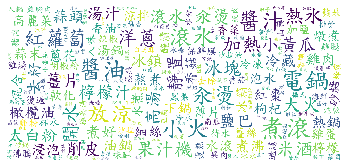

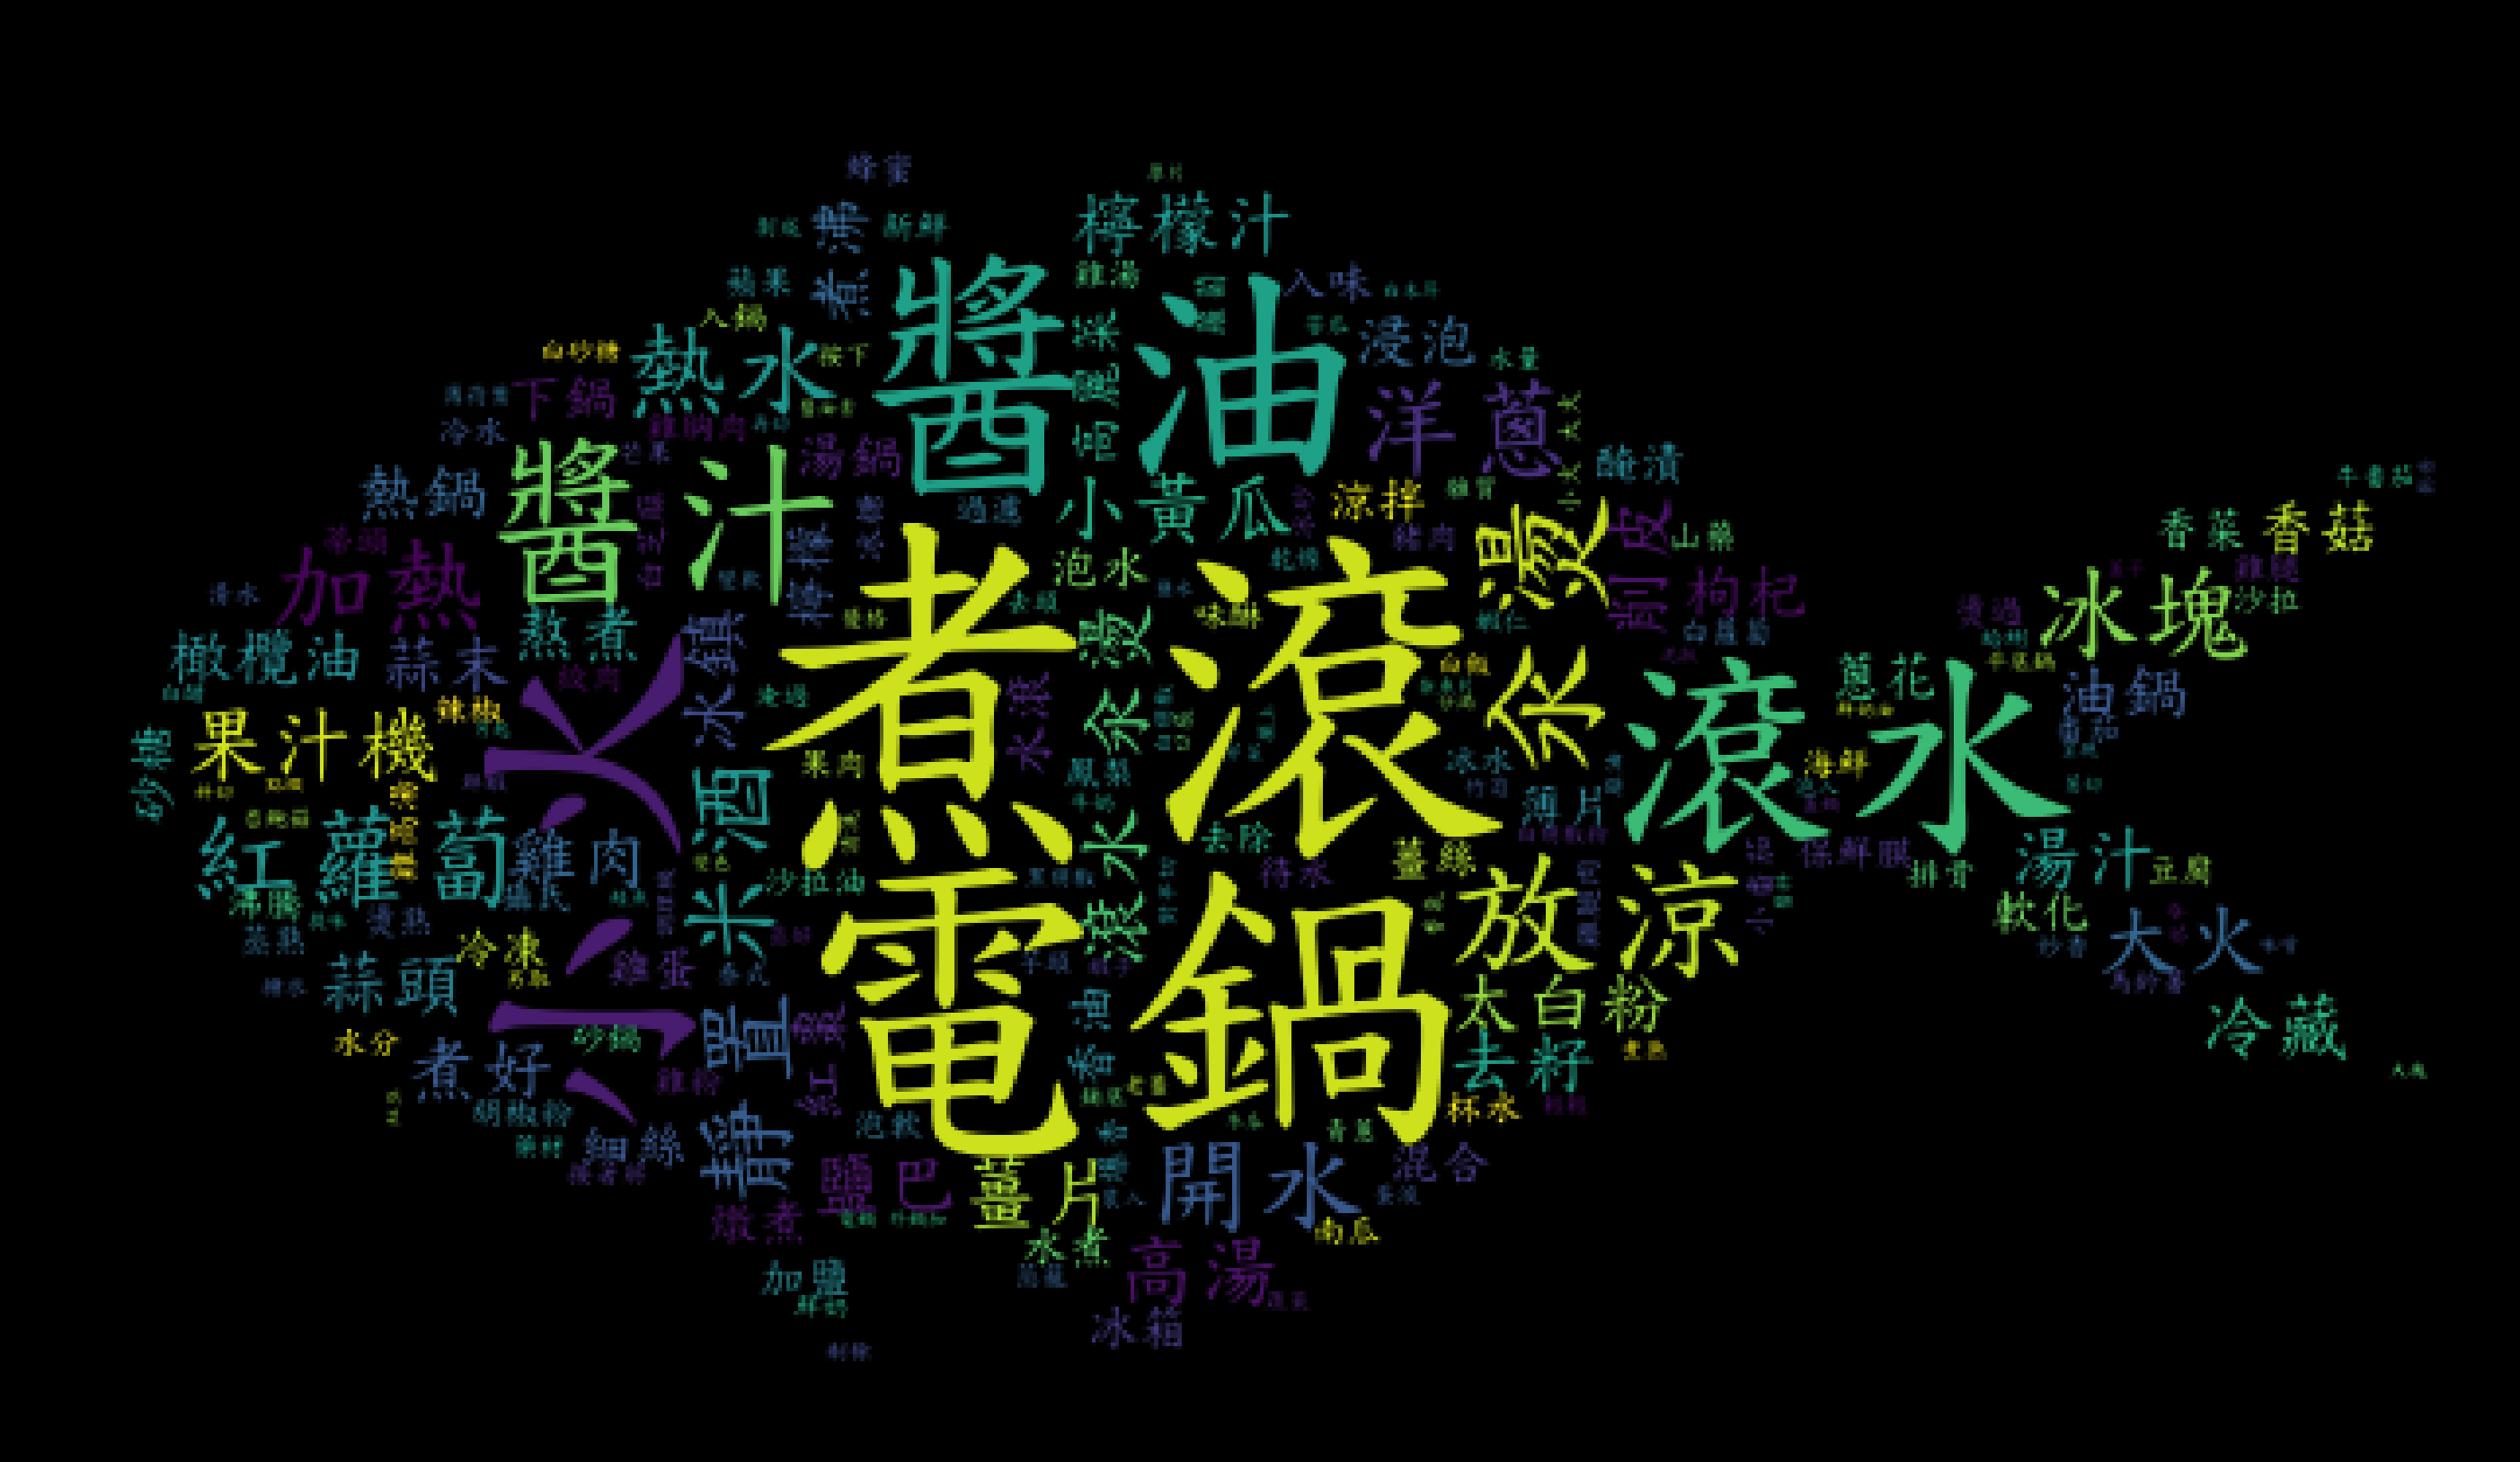

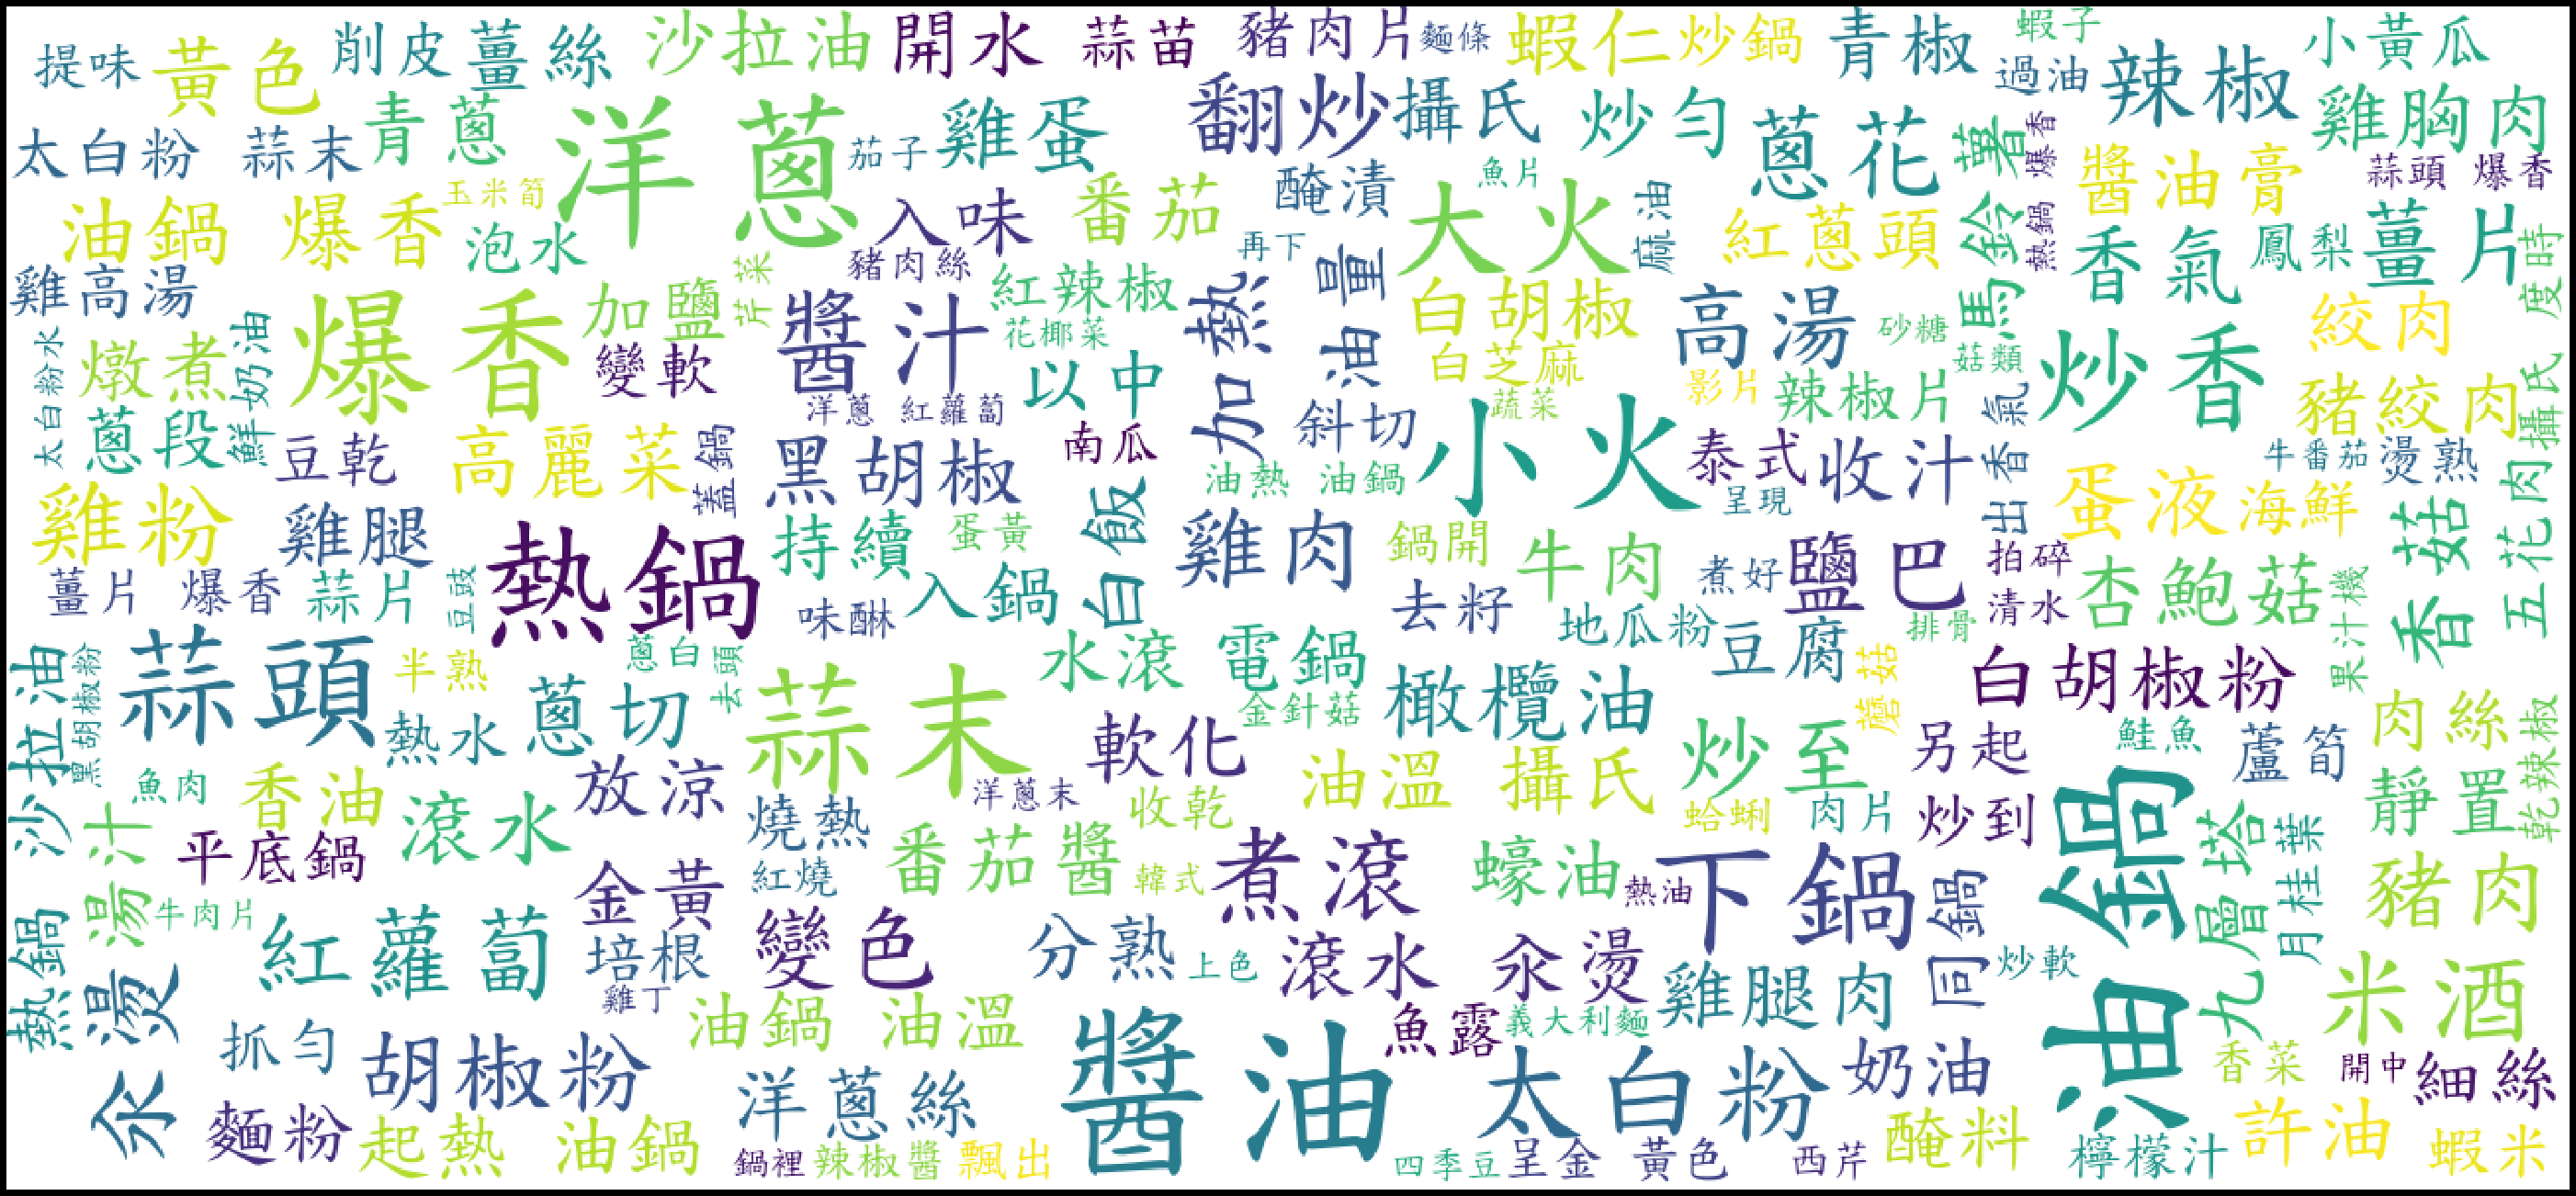

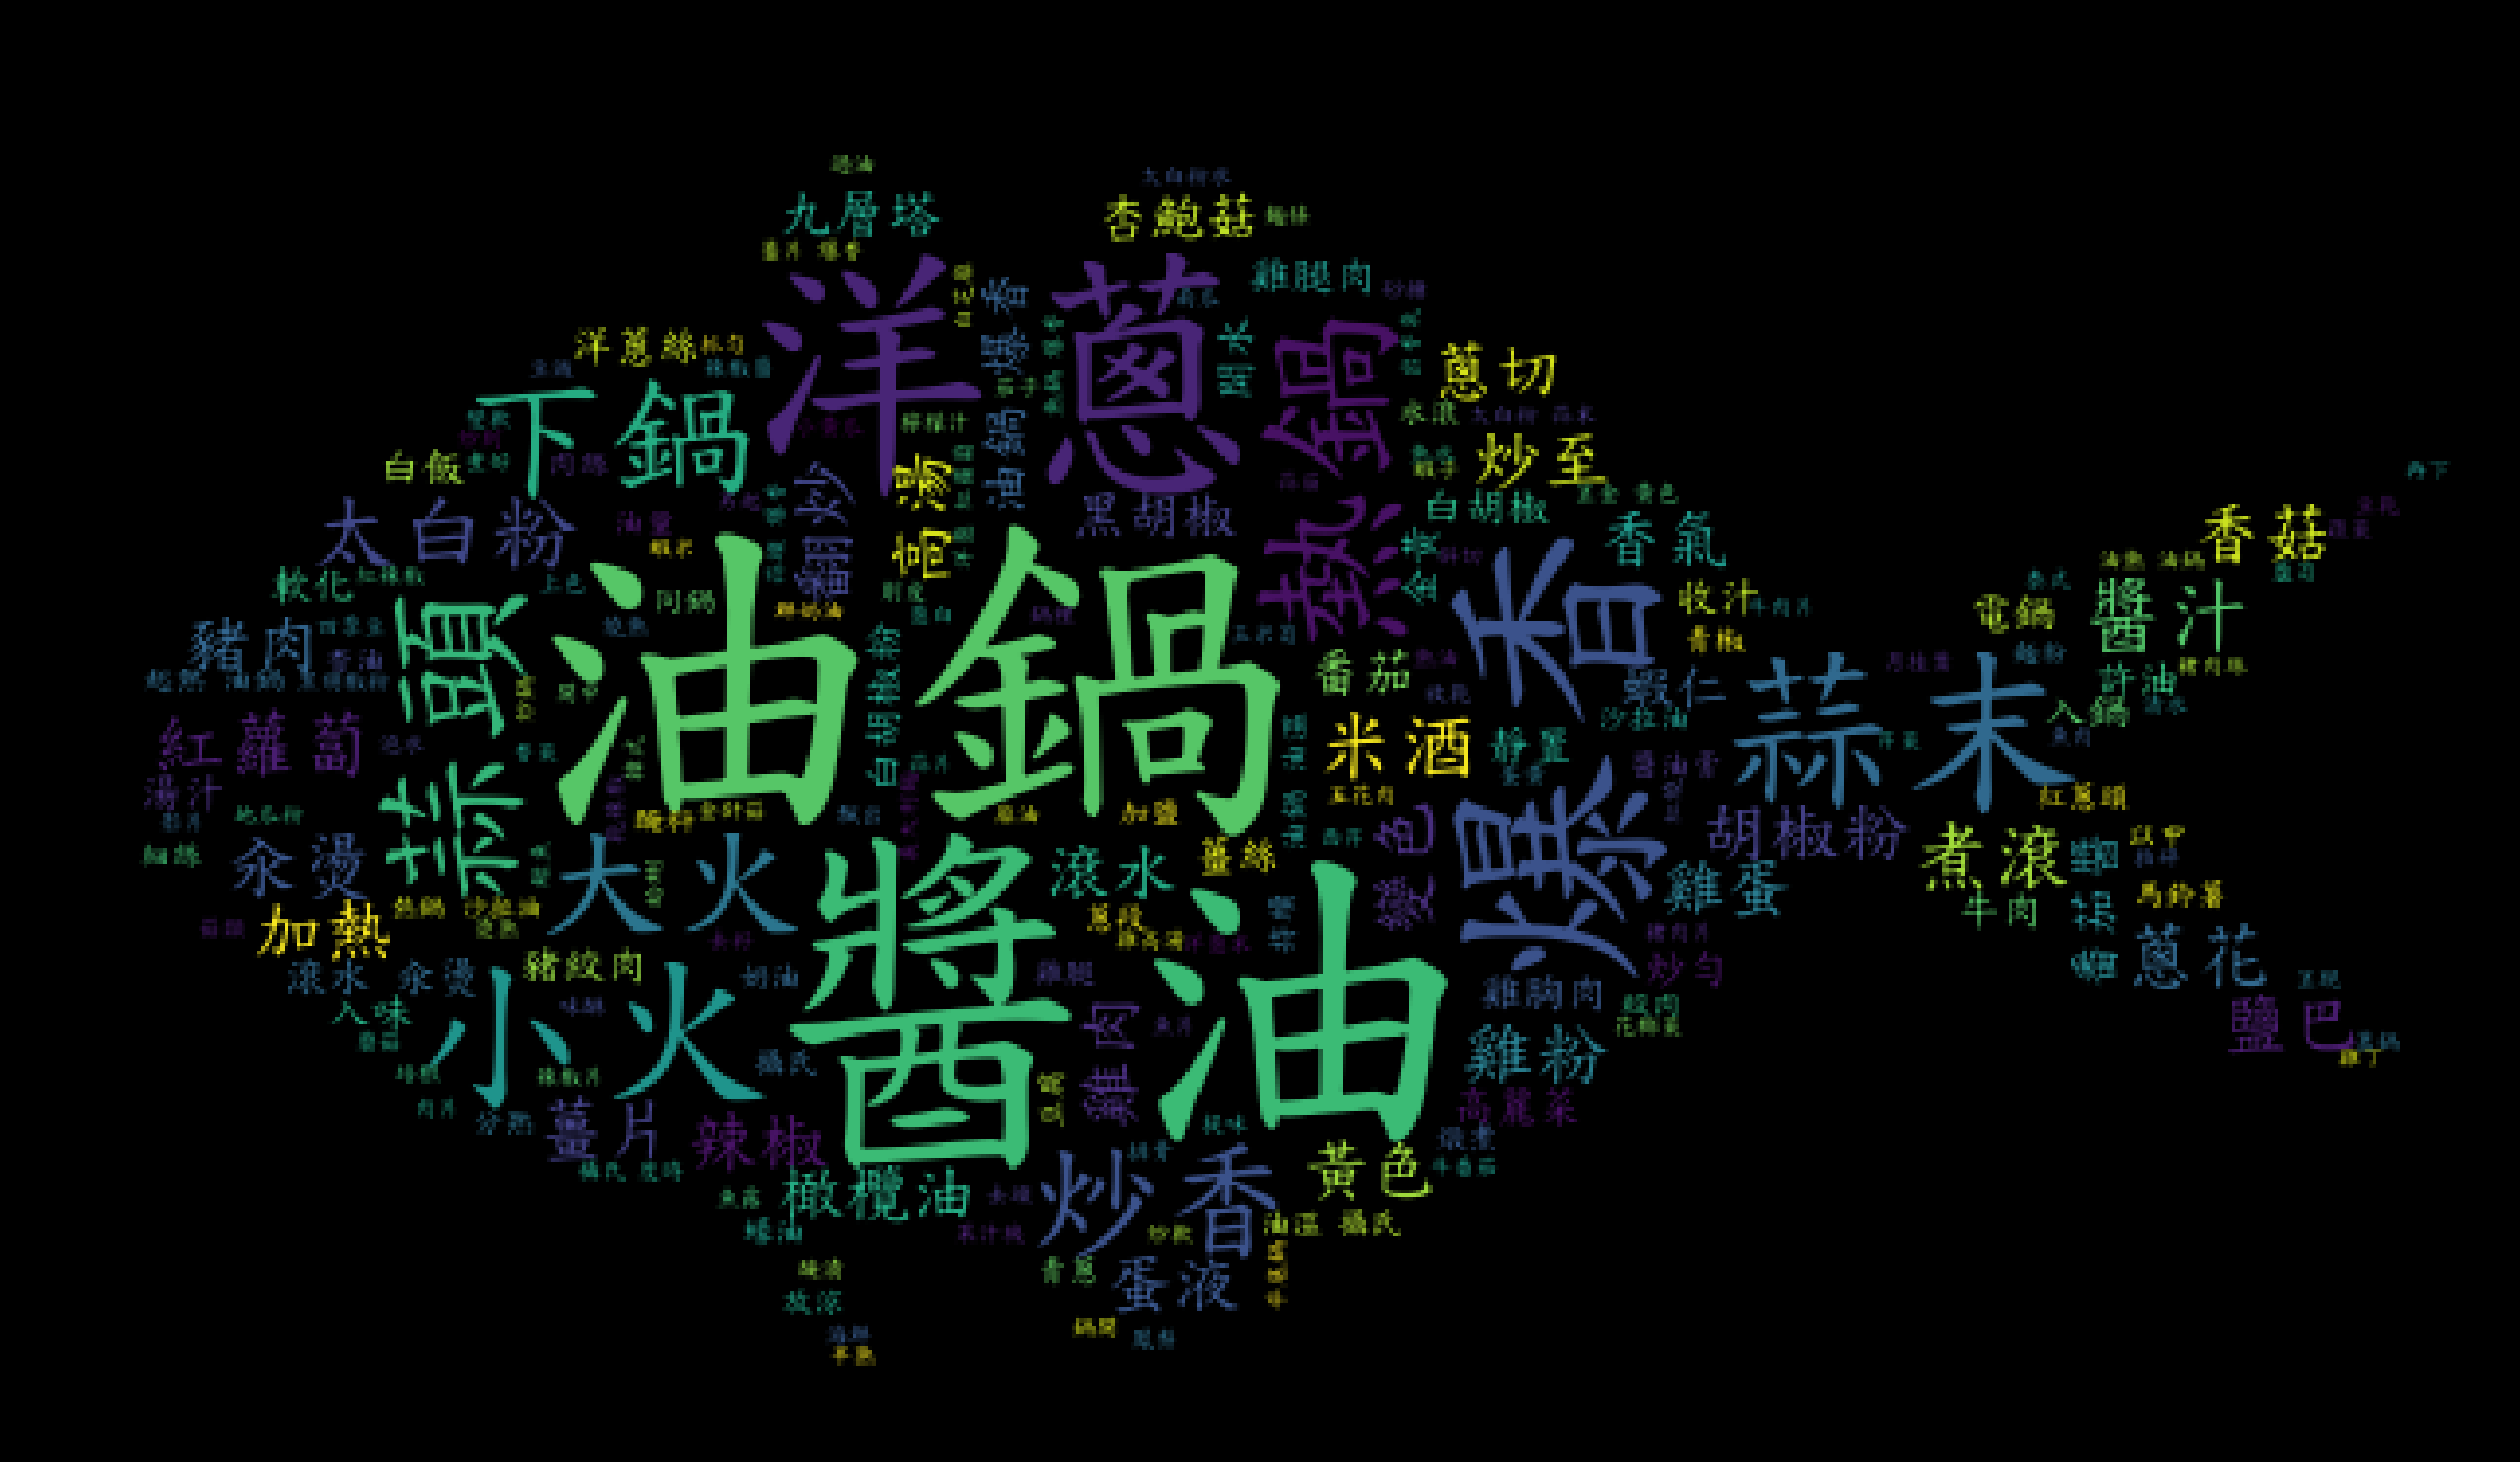

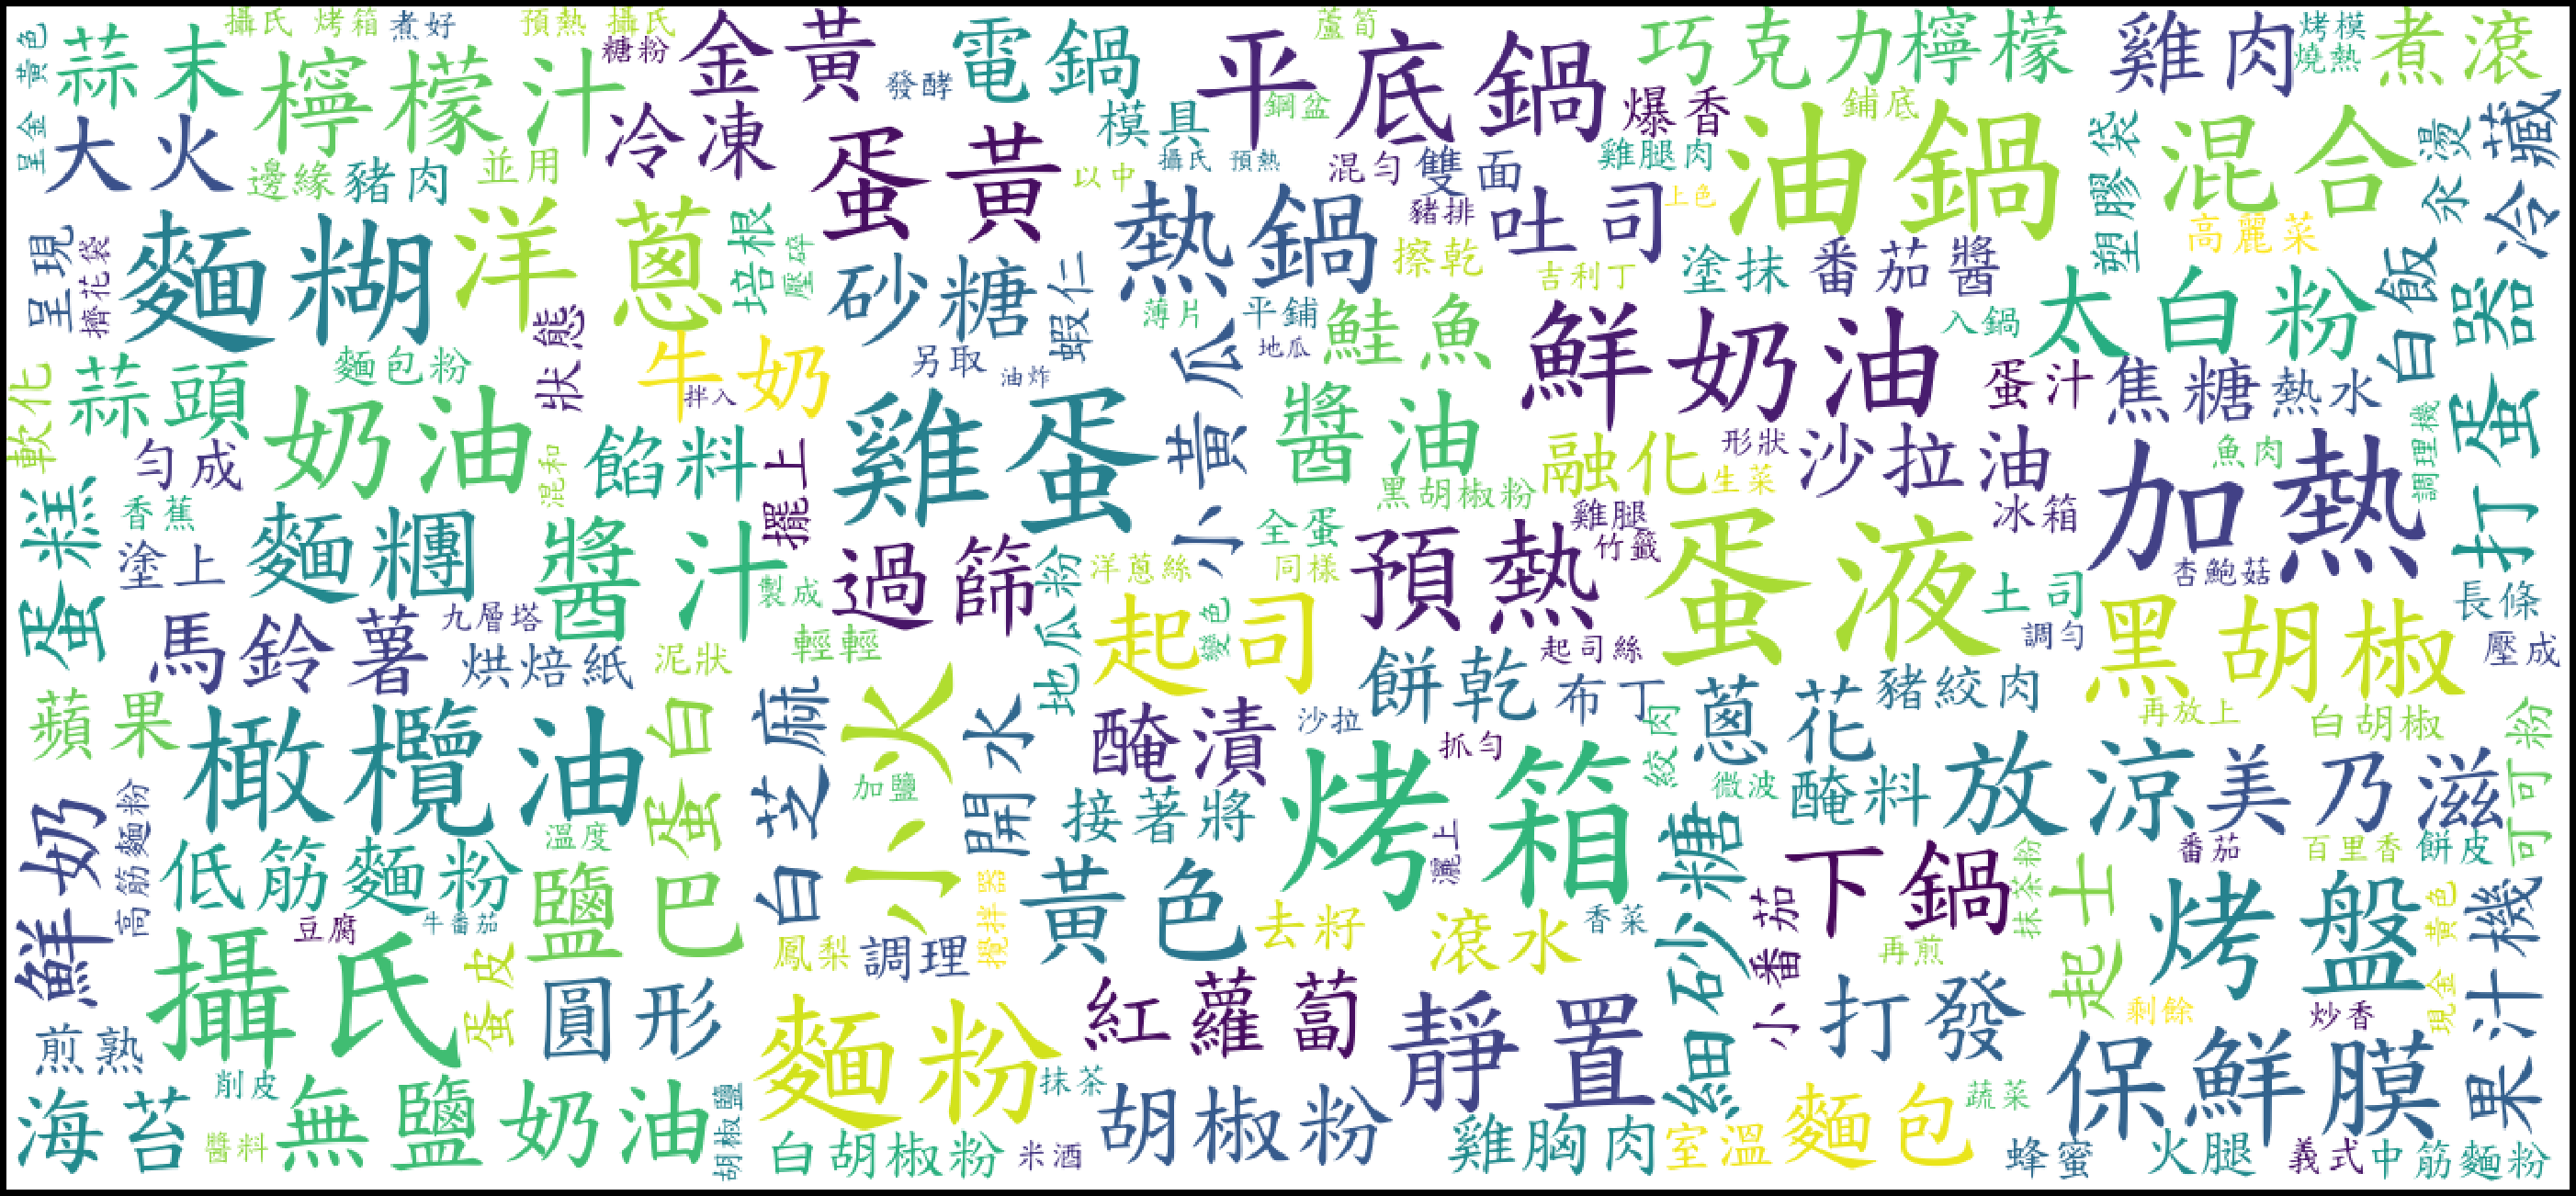

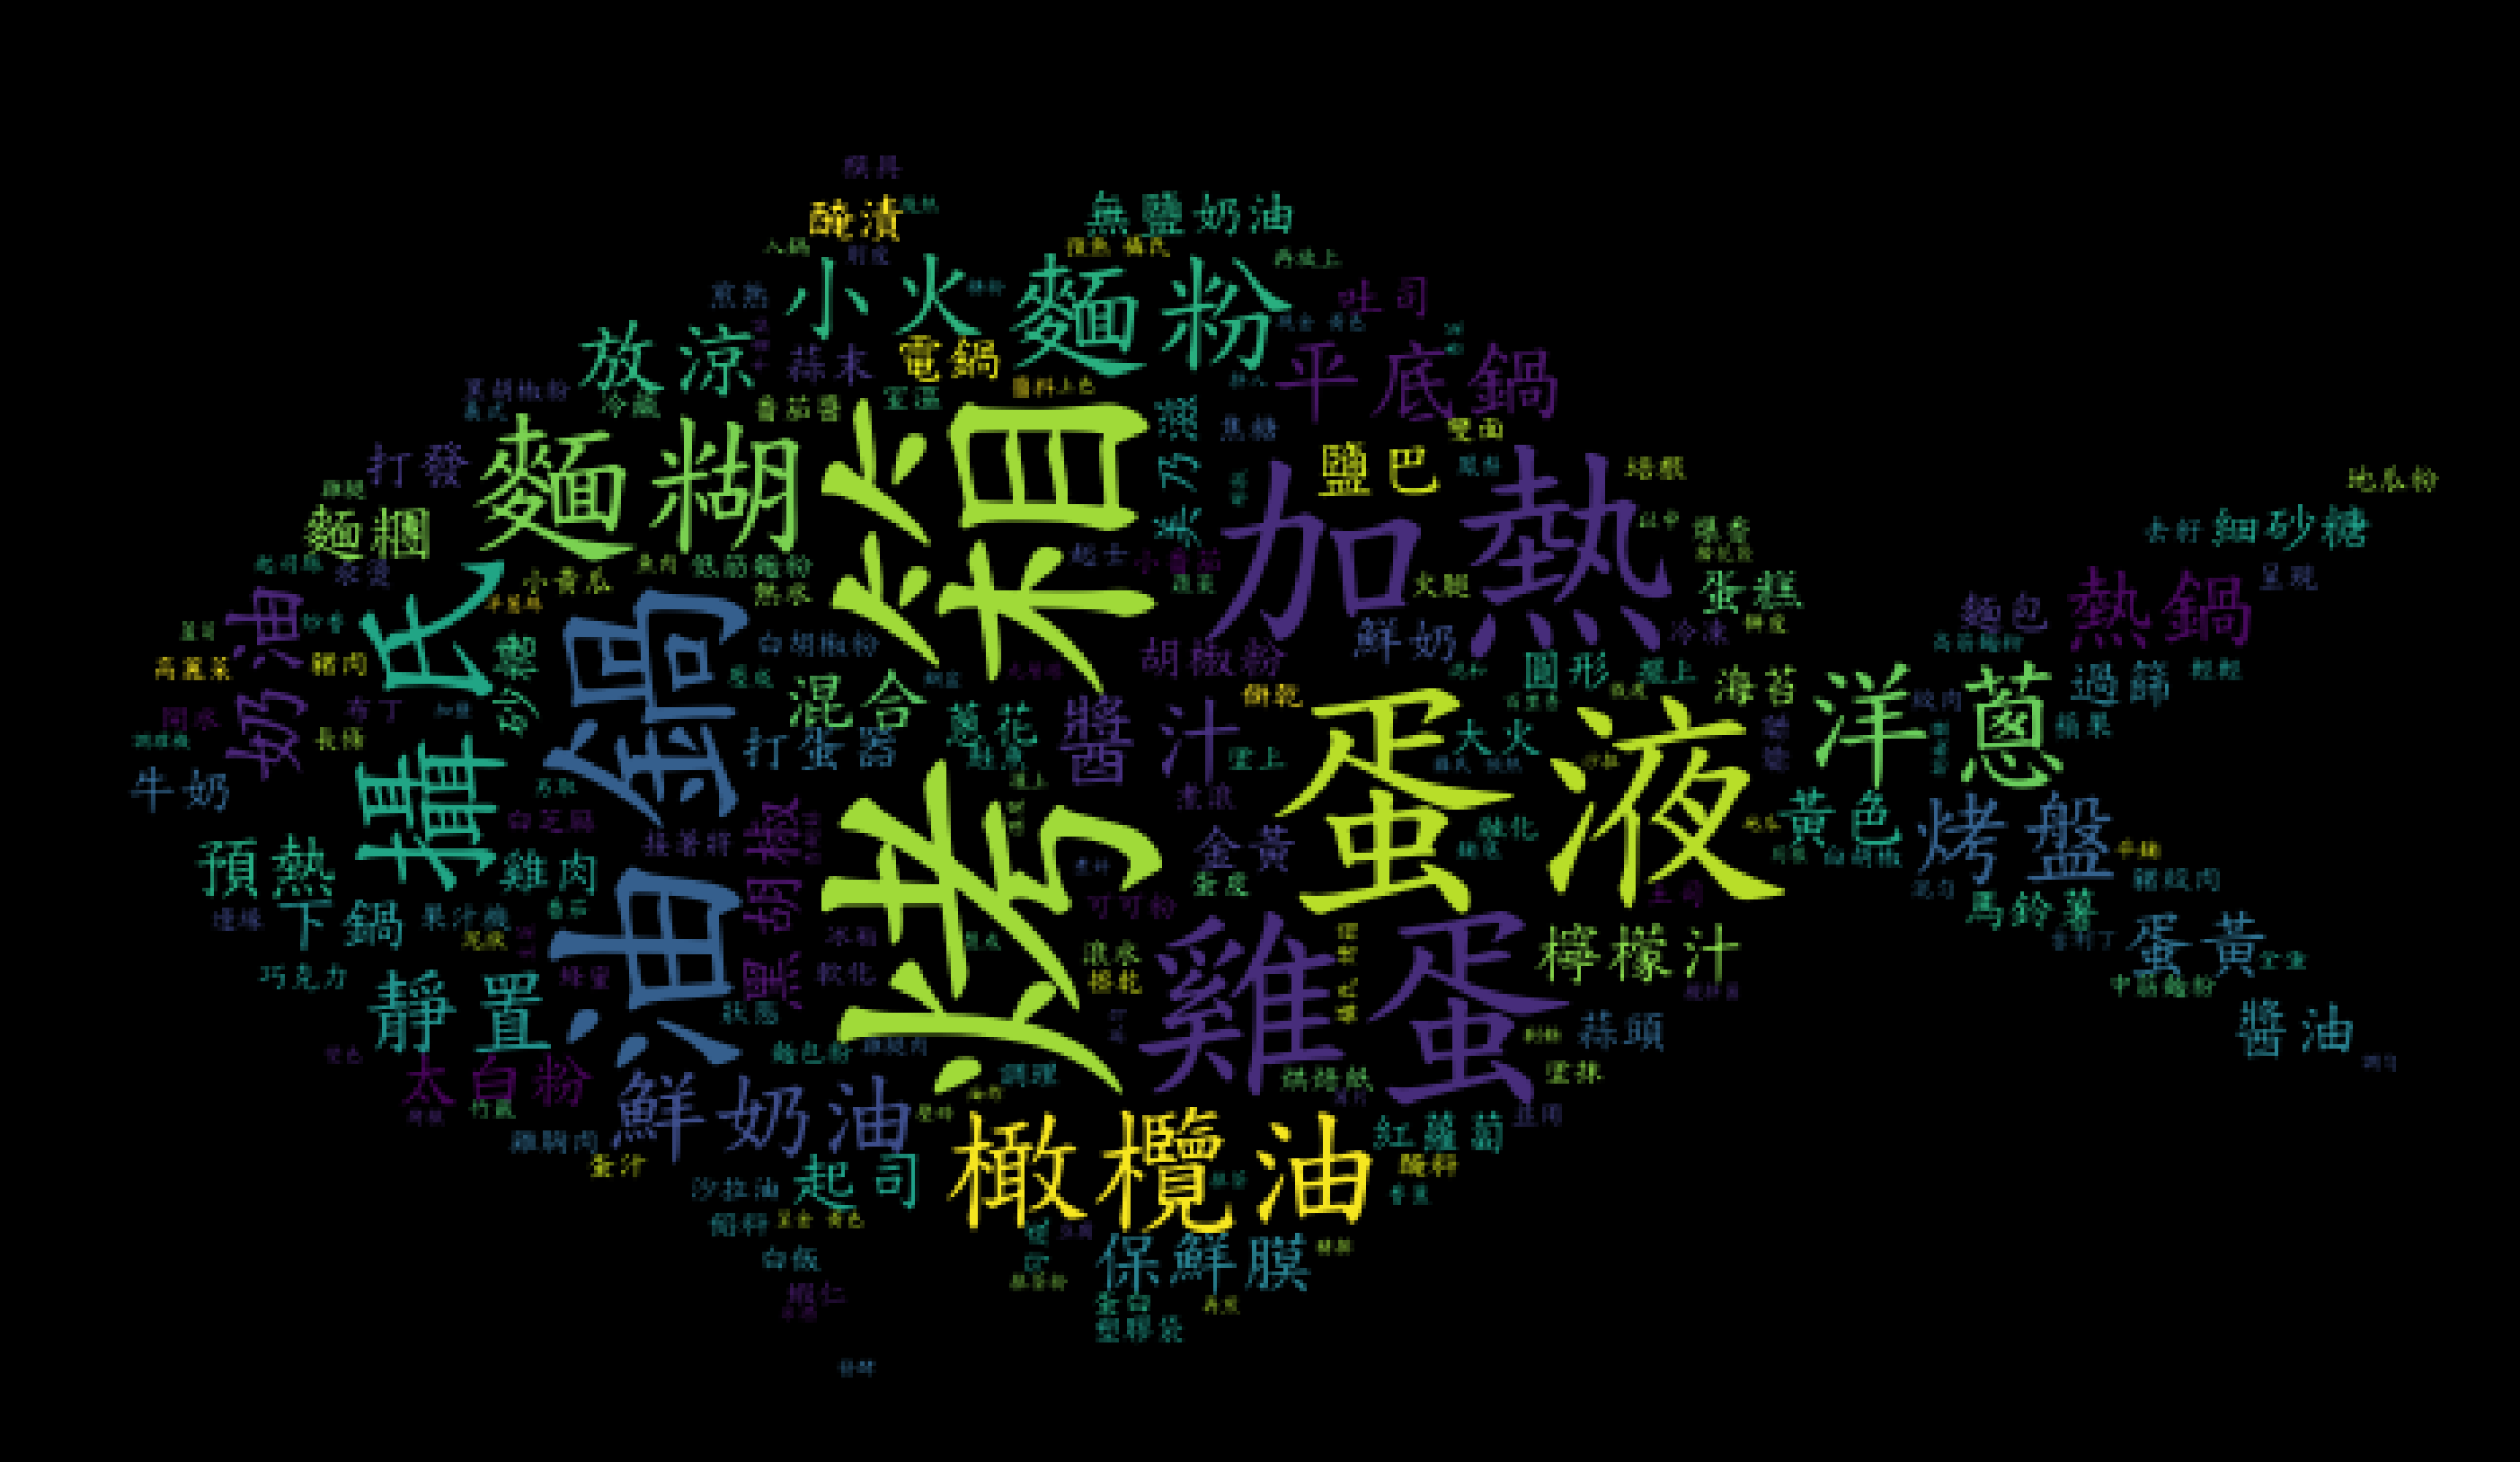

<Figure size 3600x3600 with 0 Axes>

In [7]:
for i in range(1,4):
    a=take_step(data,i)
    draw_wordcloud(a,i)
    draw_wordcloud_fish(a,i)

In [ ]:
#用集合方式把第某群減去其他群，得到唯一的詞，效果不好，因為大部分的詞都被刪去，剩下冷門沒段好的詞
# data=pd.read_csv("F:\資策會\專題\R跟jupyternotebook_code\complete.csv")
# #取出步驟放進df
# with open(wordcloud_path2,"r", encoding='utf-8') as f:
#     ori_list=f.readlines()
#     clean_list=[]
#     for i in ori_list:
#         i=i.strip("\n")
#         tmp=i.split(",")
#         clean_list.append(set(tmp))
#     print(clean_list)
# data["step"]=clean_list

In [ ]:
# #根據fit的值，結合那些step
# s1=take_step(data,1)
# s2=take_step(data,2)
# s3=take_step(data,3)
# ss1_1=s1.symmetric_difference(s2)
# ss1_2=s1.symmetric_difference(s3)
# ss1_final=ss1_1.intersection(ss1_2)
# #print(ss1_final)
# ss2_1=s2.symmetric_difference(s1)
# ss2_2=s2.symmetric_difference(s3)
# ss2_final=ss2_1.intersection(ss2_2)
# ss3_1=s3.symmetric_difference(s2)
# ss3_2=s3.symmetric_difference(s1)
# ss3_final=ss3_1.intersection(ss3_2)
# a=" ".join(list(ss1_final))
# b=" ".join(list(ss2_final))
# c=" ".join(list(ss3_final))
# draw_wordcloud(a,1)
# draw_wordcloud(b,2)
# draw_wordcloud(c,3)

In [ ]:
# #根據fit的值，結合那些step
# def take_step(data,n):
#     same_group_list=[]
#     filter=(data["fit"] == n)
#     for i in data[filter]["step"]:
#         same_group_list.append(i)
#     for n,i in enumerate(same_group_list):
#             if n<len(same_group_list)-1:
#                 same_group_list[n+1]=same_group_list[n].union(same_group_list[n+1])
#                 final=same_group_list[n+1]
#     #print(final)
#     return final
# #take_step(data,1)